# KNN from scratch

In [5]:
# Example of calculating Euclidean distance
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(a, b):
    distance = 0.0
    for i in range(len(a)-1):
        distance += (a[i] - b[i])**2
    return sqrt(distance)

# fetch nearest k neighbors
def get_neighbors(trainset, target, k):
    distances = []
    for trainrow in trainset:
        distance = euclidean_distance(trainrow, target)
        distances.append((trainrow, distance))
    distances.sort(key=lambda tup: tup[1])
    
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

# predict by majority
def predict_class(trainset, target, k):
    neighbors = get_neighbors(trainset, target, k)
    labels = [neighbor[-1] for neighbor in neighbors]
    prediction = max(set(labels), key=labels.count)
    return prediction

# Test distance function
# (row[0], row[1]) as instance, row[2] as label
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
row0 = dataset[0]
get_neighbors(dataset, row0, 3)

[[2.7810836, 2.550537003, 0],
 [3.06407232, 3.005305973, 0],
 [1.465489372, 2.362125076, 0]]

In [21]:
print(type(row0[0]))

<class 'float'>


Expected 0, Got 0.


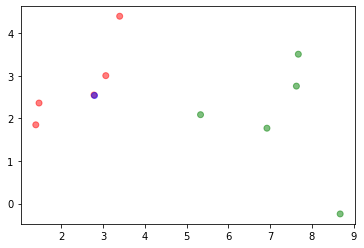

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
colors = {0:'r', 1:'g'}
df = pd.DataFrame(dataset, columns = ['x', 'y', 'class'])

prediction = predict_class(dataset[1:], dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

plt.scatter(df['x'], df['y'], c = df['class'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(df.iloc[0]['x'], df.iloc[0]['y'], c = 'blue', alpha = 0.5)